In [ ]:
from lizard import lizard

In [12]:
lizard(3)

3


3

In [3]:
from fla import *

ModuleNotFoundError: No module named 'triton'

### Matmul

##### numpy

In [1]:
from typing import overload

import numpy as np
import numpy.typing as npt

In [2]:
@overload
def matmul(a: npt.NDArray[np.float32], b: npt.NDArray[np.float32]) -> np.ndarray: ...

In [3]:
def matmul(a, b):
    return a @ b

In [4]:
matmul(np.ones([1, 4], dtype='f'), np.ones([4, 1], dtype='f'))

array([[4.]], dtype=float32)

In [5]:
A = np.array([[1.0, 2.0], [3.0, 4.0]], dtype='f')
B = np.array([[5.0, 6.0], [7.0, 8.0]], dtype='f')
C = np.array([[19.0, 22.0], [43.0, 50.0]])
assert np.allclose(matmul(A, B), C), "failed."

In [6]:
A = np.array([1.0, 2.0, 3.0], dtype='f')
B = np.array([[4.0], [5.0], [6.0]], dtype='f')
C = np.array([[32.0]])
assert np.allclose(matmul(A, B), C), "failed."

In [7]:
A = np.random.rand(8192, 6144)
B = np.random.rand(6144, 4096)

In [8]:
import timeit
result = timeit.timeit('matmul(A, B)', globals=globals(), number=1)

In [9]:
result

3.5828007500094827

In [10]:
result = timeit.timeit('matmul(A, B)', globals=globals(), number=10)


In [11]:
result

20.280263916996773

In [12]:
import cProfile, pstats

cProfile.run('matmul(A, B)', 'profiler')
pstats.Stats('profiler').strip_dirs().sort_stats('tottime').print_stats()

Sun Nov  2 13:38:00 2025    profiler

         4 function calls in 2.664 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.661    2.661    2.661    2.661 1409129159.py:1(matmul)
        1    0.003    0.003    2.664    2.664 <string>:1(<module>)
        1    0.000    0.000    2.664    2.664 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [13]:
def profile(matmul, a, b):
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()
    matmul(a, b)
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('tottime')
    stats.print_stats()

In [14]:
profile(matmul, A, B)

         2 function calls in 2.394 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.394    2.394    2.394    2.394 /var/folders/_z/49hgcx6x4db7pjpfzjcphlcm0000gn/T/ipykernel_92810/1409129159.py:1(matmul)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [22]:
!pip install snakeviz



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
%load_ext snakeviz
%snakeviz matmul(A, B)


 
*** Profile stats marshalled to file '/var/folders/_z/49hgcx6x4db7pjpfzjcphlcm0000gn/T/tmppui8t1p_'.
Embedding SnakeViz in this document...
<function display at 0x106a037f0>


#### PyTorch

In [10]:
! pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [11]:
import torch

In [12]:
torch.__version__

'2.9.0'

In [13]:
@overload
def matmul_pytorch(a: ..., b: ...): ...

In [14]:
def matmul_pytorch(a, b):
    import torch
    return torch.matmul(a, b)

In [15]:
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
B = torch.tensor([[5.0, 6.0], [7.0, 8.0]])
C = torch.tensor([[19.0, 22.0], [43.0, 50.0]])

In [16]:
assert torch.allclose(matmul_pytorch(A, B), C), "failed"

In [20]:
A = torch.tensor(np.random.rand(8192, 6144), device="cpu")
B = torch.tensor(np.random.rand(6144, 4096), device="cpu")

In [21]:
import cProfile, pstats

cProfile.run('matmul_pytorch(A, B)', 'profiler')
pstats.Stats('profiler').strip_dirs().sort_stats('tottime').print_stats()

Sun Nov  2 14:09:22 2025    profiler

         5 function calls in 1.899 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.895    1.895    1.895    1.895 {built-in method torch.matmul}
        1    0.003    0.003    1.899    1.899 <string>:1(<module>)
        1    0.000    0.000    1.899    1.899 {built-in method builtins.exec}
        1    0.000    0.000    1.895    1.895 2296730478.py:1(matmul_pytorch)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [24]:
%load_ext snakeviz
%snakeviz matmul_pytorch(A, B)


The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
 
*** Profile stats marshalled to file '/var/folders/_z/49hgcx6x4db7pjpfzjcphlcm0000gn/T/tmpw7hql467'.
Embedding SnakeViz in this document...
<function display at 0x106a037f0>


NVIDIA T4 GPU 

- Turing Architecture
- No HBM - only uses GDDR6
- 2560 Tensor Core
- 40 SMs
---

- L0 - warp-level cache
- L1 cache + shared memory (64-128 KB per SM)
- L2 cache (4 MB global)
- GDDRM6 VRAM (16 GB, 320 GB/s)

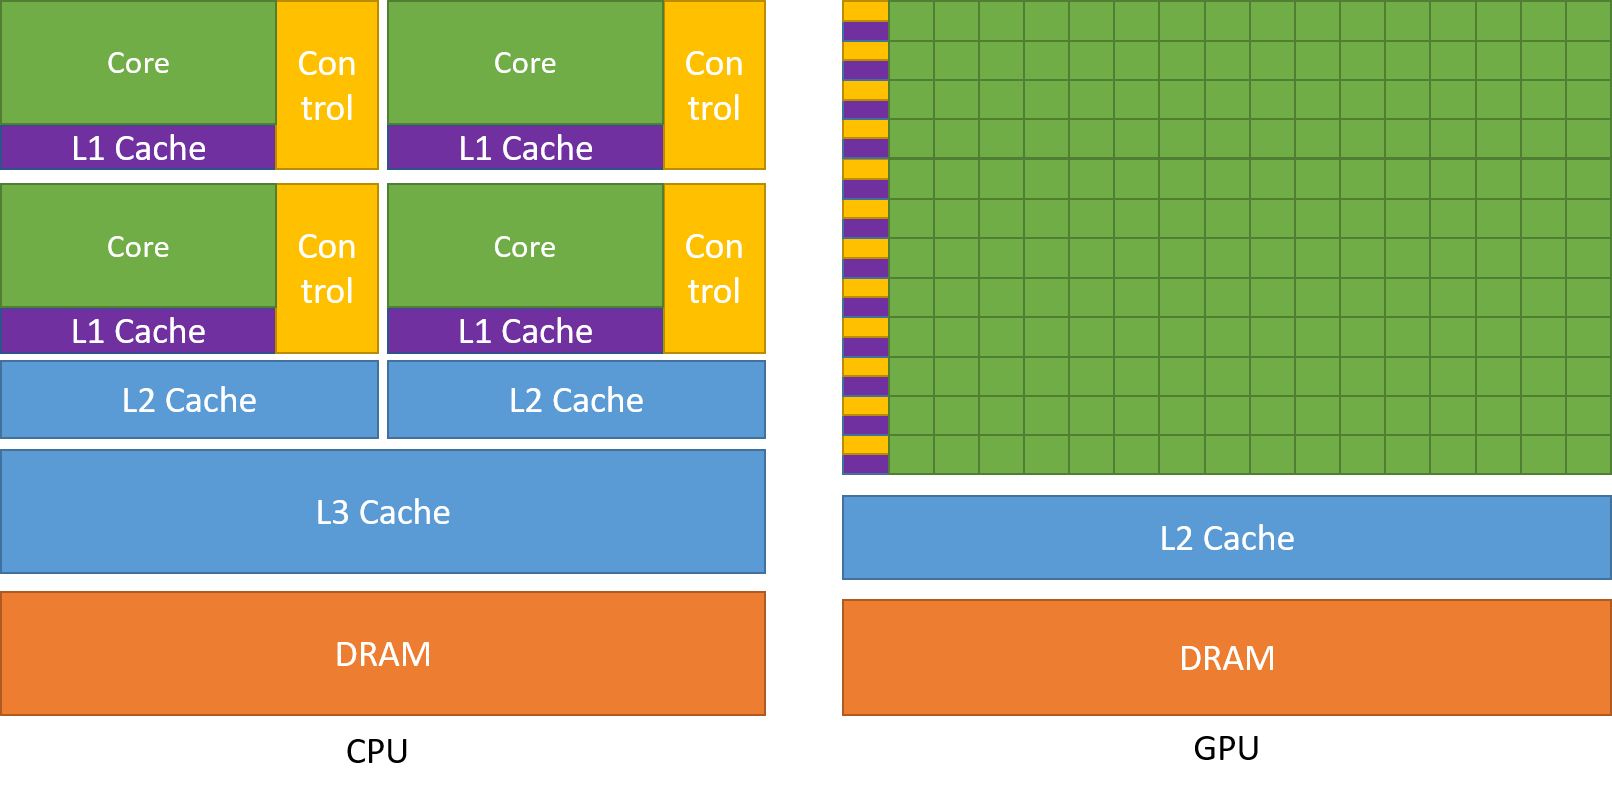

#### Triton